In [1]:
import networkx as nx

In [2]:
g = nx.DiGraph()

g.add_edges_from([("x1", "z1"), ("x2", "z1"), ("x1", "z2"), ("z2", "y"), ("z1", "y")])

In [3]:
g.add_edge("x1", "z2", data=lambda x: x + 1)

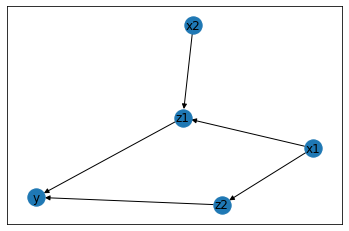

In [4]:
nx.draw_networkx(g)

In [6]:
g.nodes(data=True)

NodeDataView({'x1': {}, 'z1': {}, 'x2': {}, 'z2': {}, 'y': {}})

In [7]:
g.edges

OutEdgeView([('x1', 'z1'), ('x1', 'z2'), ('z1', 'y'), ('x2', 'z1'), ('z2', 'y')])

In [8]:
for node in g:
    print(g.out_edges(node))

[('x1', 'z1'), ('x1', 'z2')]
[('z1', 'y')]
[('x2', 'z1')]
[('z2', 'y')]
[]


In [22]:
from typing import List
from dataclasses import dataclass


@dataclass
class TestObj(object):
    name: str
    values: List[int]

    def __hash__(self):
        return hash(self.name)


g.add_node(TestObj("red", [4, 3]))

In [24]:
g["red"]

KeyError: 'red'

In [19]:
g.nodes["x1"]["blue"] = True
for n in g.nodes(data=True):
    print(n)
    print(n in g)

('x1', {'blue': True})
False
('z1', {})
False
('x2', {})
False
('z2', {})
False
('y', {})
False


True

In [10]:
for node in nx.topological_sort(g):
    print(f"Node: {node}")
    # If node is param: just assign the forward method. Create a source -> cur edge
    # if node is a obs: make it a MT node depending on number of children
    print("Children: ")
    for nbr, datadict in g.succ[node].items():
        print(f"nbr: {nbr}")
        print(f"data: {datadict}")

Node: x1
Children: 
nbr: z1
data: {}
nbr: z2
data: {'data': <function <lambda> at 0x7fbbf88fb040>}
Node: x2
Children: 
nbr: z1
data: {}
Node: z2
Children: 
nbr: y
data: {}
Node: z1
Children: 
nbr: y
data: {}
Node: y
Children: 


In [62]:
list(zip(["source"] * len(g.succ["x1"]), g.succ["x1"]))

[('source', 'z1'), ('source', 'z2')]

In [65]:
childrens = g.succ["x1"]
test = nx.DiGraph()

test.add_edges_from([("source", child, {"forward": lambda x: x}) for child in childrens])

In [68]:
test.edges(data=True)

OutEdgeDataView([('source', 'z1', {'forward': <function <listcomp>.<lambda> at 0x7fda6bc250d0>}), ('source', 'z2', {'forward': <function <listcomp>.<lambda> at 0x7fda6bc25160>})])

In [81]:
for node, data in g.nodes(data=True):
    data["test"] = "hi"

In [84]:
g.nodes(data=True)

NodeDataView({'x1': {'data': <function <lambda> at 0x7fda6bd7a820>, 'test': 'hi'}, 'z1': {'test': 'hi'}, 'x2': {'test': 'hi'}, 'z2': {'test': 'hi'}, 'y': {'test': 'hi'}})

In [85]:
g.pred["y"]

AtlasView({'z2': {}, 'z1': {}})

In [96]:
for node in nx.topological_sort(g):
    print(g.nodes[node])
    print(node)

hi
x2
hi
x1
hi
z2
hi
z1
hi
y
